In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import chardet

with open("C:\\Users\\gowth\\Desktop\\IMDb Movies India.csv", 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])


ISO-8859-1


In [13]:
df = pd.read_csv("C:\\Users\\gowth\\Desktop\\IMDb Movies India.csv", encoding='latin-1')


In [14]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.shape()

TypeError: 'tuple' object is not callable

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [17]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [18]:
df.duplicated().sum()

6

In [19]:
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [22]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [23]:
unique_genres = df['Genre'].unique()

In [24]:
unique_genres

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [25]:
attr = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
df.dropna(subset = attr, inplace = True)
missing_values = df.isnull().sum()
print(missing_values)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


C:\Users\gowth\AppData\Local\Temp\ipykernel_19880\2653966643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = attr, inplace = True)


In [26]:
rating_distribution =df['Rating'].value_counts()
rating_distribution

Rating
6.8     209
6.5     198
6.2     194
6.6     171
7.1     168
       ... 
1.6       2
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 83, dtype: int64

In [27]:
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [28]:
df.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15482,Zindagi Zindabad,-2000.0,140 min,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15487,Zokkomon,-2011.0,109 min,"Action, Adventure, Family",4.0,351,Satyajit Bhatkal,Darsheel Safary,Anupam Kher,Manjari Fadnnis
15488,Zoo,-2018.0,100 min,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta
15490,Zor: Never Underestimate the Force,-1998.0,157 min,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji
15492,Zorro,-1975.0,150 min,"Action, Adventure, Comedy",5.6,33,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [29]:
movie_rating = df[['Name', 'Director', 'Rating']]
movie_rating

,Name,Director,Rating
1,#Gadhvi (He thought he was Gandhi),Gaurav Bakshi,7.0
3,#Yaaram,Ovais Khan,4.4
5,...Aur Pyaar Ho Gaya,Rahul Rawail,4.7
6,...Yahaan,Shoojit Sircar,7.4
8,?: A Question Mark,Allyson Patel,5.6
...,...,...,...
15493,Zubaan,Mozez Singh,6.1
15494,Zubeidaa,Shyam Benegal,6.2
15503,Zulm Ki Zanjeer,S.P. Muthuraman,5.8
15505,Zulmi,Kuku Kohli,4.5


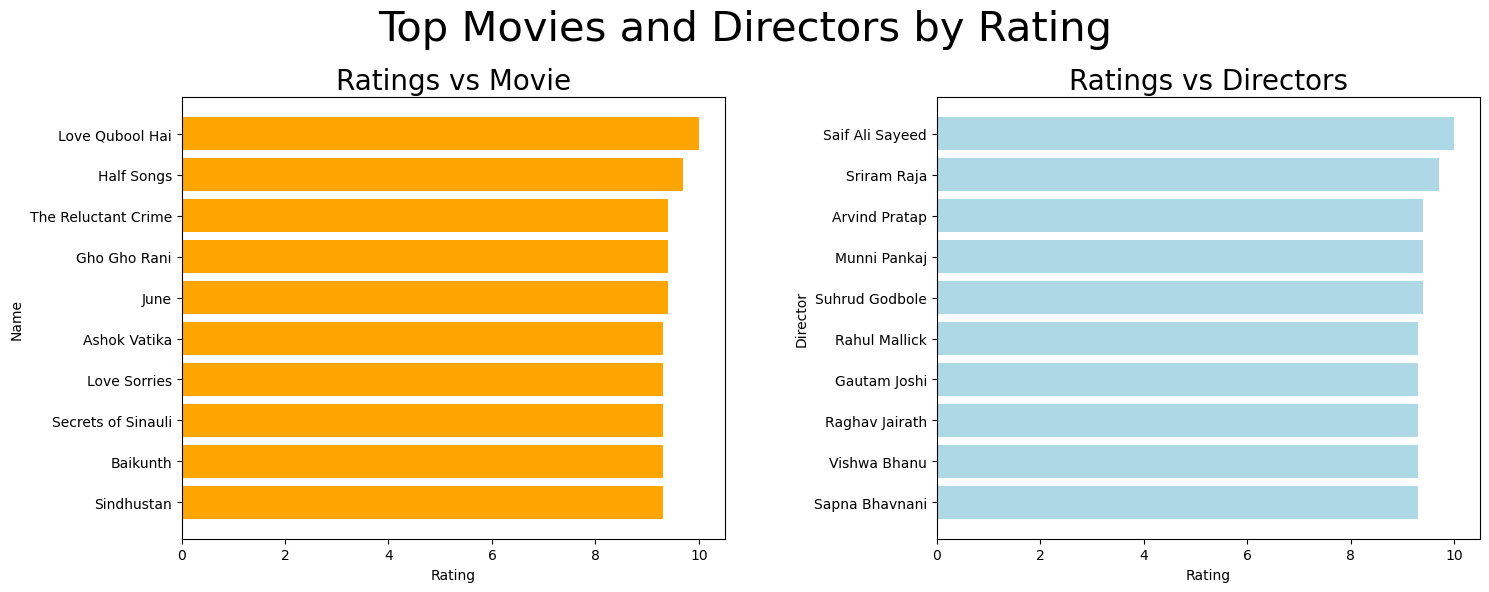

In [30]:
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_directors = df.sort_values(by='Rating', ascending=False).head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.barh(top_movies['Name'], top_movies['Rating'], color='orange')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Name')
ax1.set_title('Ratings vs Movie', size=20)
ax1.invert_yaxis()

ax2.barh(top_directors['Director'], top_directors['Rating'], color='lightblue')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Director')
ax2.set_title('Ratings vs Directors', size=20)
ax2.invert_yaxis()

plt.suptitle('Top Movies and Directors by Rating', size=30)
plt.tight_layout(w_pad=5)
plt.show()

C:\Users\gowth\AppData\Local\Temp\ipykernel_19880\2292538692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


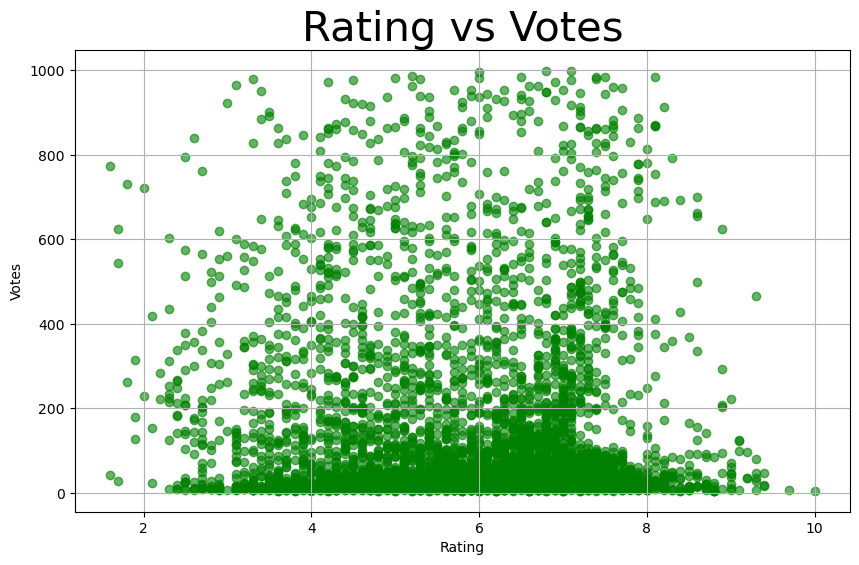

In [31]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
plt.figure(figsize = (10,6))
plt.scatter(df['Rating'],df['Votes'], alpha=0.6, color='g')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs Votes', size=30)
plt.grid(True)
plt.show()

C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


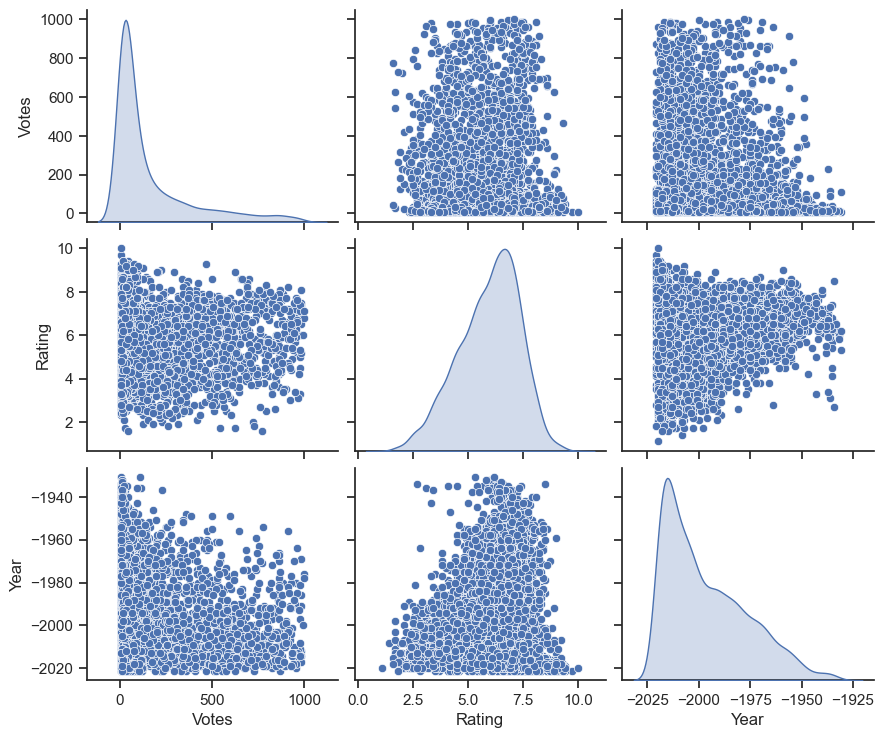

In [32]:
col = ['Votes', 'Rating', 'Year', 'Duration']
sns.set(style = 'ticks')
sns.pairplot(df[col], diag_kind = 'kde', markers = 'o', height = 2.5, aspect = 1.2)
plt.show()

In [34]:
df_sorted = df.sort_values(by = 'Votes', ascending = False)
df_sorted['Vote Count Percentile'] = df_sorted['Votes'].rank(pct = True)*100
df_sorted.reset_index(drop = True, inplace = True)
df_sorted[['Name', 'Votes', 'Vote Count Percentile']]

,Name,Votes,Vote Count Percentile
0,Satyam Shivam Sundaram: Love Sublime,999.0,100.000000
1,Hera Pheri,998.0,99.977689
2,Kurukshetra,996.0,99.955377
3,Dishkiyaoon,986.0,99.933066
4,Kadvi Hawa,985.0,99.899598
...,...,...,...
5846,Ziddi,NaN,NaN
5847,Zila Ghaziabad,NaN,NaN
5848,Zinda,NaN,NaN
5849,Zindagi Na Milegi Dobara,NaN,NaN


In [35]:
df = df.dropna(subset = 'Votes')
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983.0,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512.0,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh
18,10ml LOVE,-2010.0,87 min,"Comedy, Drama, Romance",6.3,162.0,Sharat Katariya,Neil Bhoopalam,Anusha Bose,Manu Rishi Chadha


In [36]:
df.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15479,Zindagi Tumse,-2019.0,120 min,Family,6.0,13.0,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15482,Zindagi Zindabad,-2000.0,140 min,Drama,5.7,7.0,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15487,Zokkomon,-2011.0,109 min,"Action, Adventure, Family",4.0,351.0,Satyajit Bhatkal,Darsheel Safary,Anupam Kher,Manjari Fadnnis
15488,Zoo,-2018.0,100 min,Drama,5.7,78.0,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta
15490,Zor: Never Underestimate the Force,-1998.0,157 min,"Action, Drama, Thriller",4.3,268.0,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji
15492,Zorro,-1975.0,150 min,"Action, Adventure, Comedy",5.6,33.0,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15493,Zubaan,-2015.0,115 min,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [37]:
df['Duration'] = df['Duration'].astype(str)
df['Year'] = df['Year'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

X = df[['Year', 'Duration', 'Votes']]
y = df['Rating']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 36)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {mae}')

Mean Absolute Error: 1.0318080578009428
Root Mean Squared Error: 1.3014836232576241
R-squared (R2) Score: 1.0318080578009428


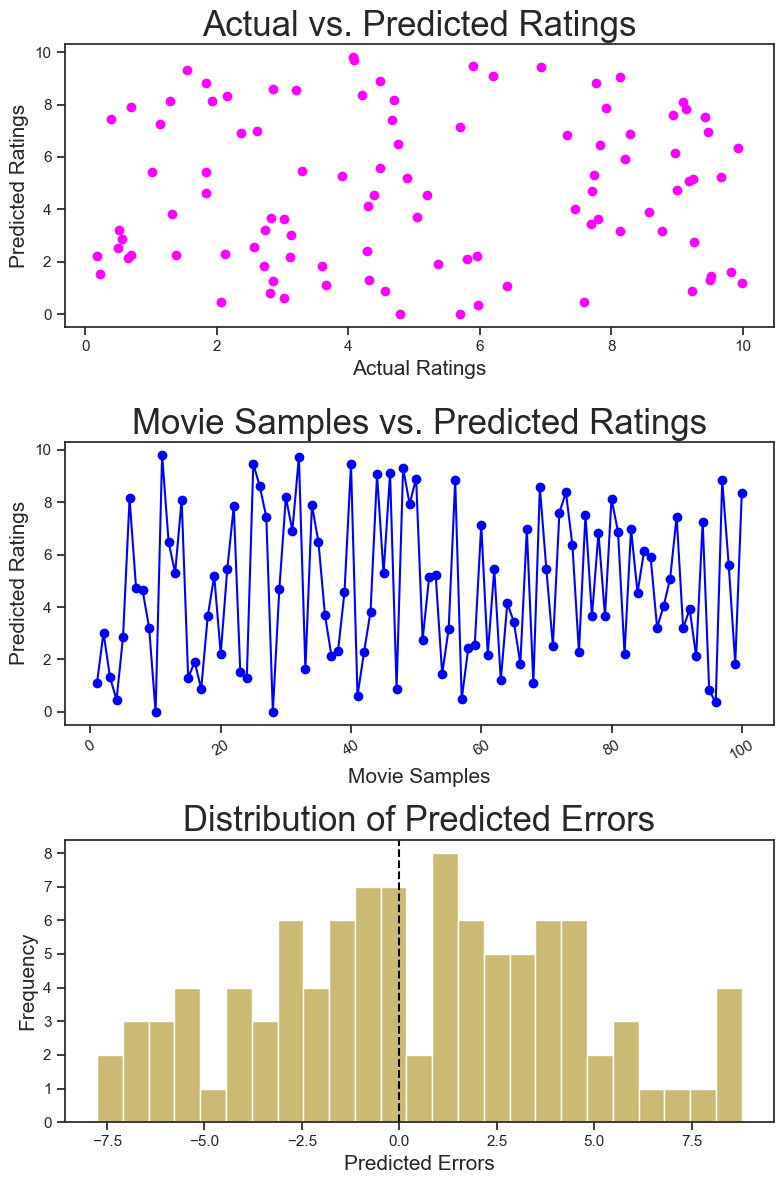

In [41]:
y_test = np.random.rand(100)*10 
y_pred = np.random.rand(100)*10
errors = y_test-y_pred
fig, axs = plt.subplots(3,1, figsize=(8,12))

#Scatter Plot
axs[0].scatter(y_test, y_pred, color='magenta')
axs[0].set_xlabel('Actual Ratings', size=15)
axs[0].set_ylabel('Predicted Ratings', size=15)
axs[0].set_title('Actual vs. Predicted Ratings', size = 25)

#Linear Plot
movie_samples = np.arange(1,len(y_pred)+1)
axs[1].plot(movie_samples, y_pred, marker = 'o', linestyle = '-', color='blue')
axs[1].set_xlabel('Movie Samples', size=15)
axs[1].set_ylabel('Predicted Ratings', size=15)
axs[1].set_title('Movie Samples vs. Predicted Ratings', size = 25)
axs[1].tick_params(axis='x', rotation = 30)

#Histogram
axs[2].hist(errors, bins = 25, color='y')
axs[2].set_xlabel('Predicted Errors', size=15)
axs[2].set_ylabel('Frequency', size=15)
axs[2].set_title('Distribution of Predicted Errors', size = 25)
axs[2].axvline(x=0, color = 'black', linestyle='--')
plt.tight_layout()
plt.show()